In [7]:
import pandas as pd

file_path = 'otog_data.csv'
data = pd.read_csv(file_path)

print("Original Data: \n")
print(data.head())

data_cleaned = data.drop(columns=['CID', 'TID'])


data_cleaned.fillna(0, inplace=True)

data_cleaned['Discount Amount (INR)'] = data_cleaned['Discount Amount (INR)'].astype(float)
data_cleaned['Gender'] = data_cleaned['Gender'].str.lower()
data_cleaned = data_cleaned[data_cleaned['Net Amount'] >= 0]
data_cleaned = data_cleaned.loc[:, ~data_cleaned.columns.duplicated()]
data_cleaned.rename(columns={'Discount Amount (INR)': 'Discount_Amount (PHP)'}, inplace=True)

exchange_rate = 0.67
data_cleaned['Discount_Amount (PHP)'] = data_cleaned['Discount_Amount (PHP)'] * exchange_rate
data_cleaned['Gross Amount'] = data_cleaned['Gross Amount'] * exchange_rate
data_cleaned['Net Amount'] = data_cleaned['Net Amount'] * exchange_rate


print("\n---------------------------------------------------------------------------------")
print("\nCleaned Data: \n")
print(data_cleaned.head())


print("\nDataFrame Info: ")
print(data_cleaned.info())

print("\nDescriptive Statistics:")
print(data_cleaned.describe(include='all'))

Original Data: 

      CID         TID  Gender     Age Group        Purchase Date  \
0  943146  5876328741  Female         25-45  30/08/2023 20:27:08   
1  180079  1018503182    Male         25-45  23/02/2024 09:33:46   
2  337580  3814082218   Other  60 and above  06/03/2022 09:09:50   
3  180333  1395204173   Other  60 and above  04/11/2020 04:41:57   
4  447553  8009390577    Male         18-25  31/05/2022 17:00:32   

   Product Category Discount Availed    Discount Name  Discount Amount (INR)  \
0       Electronics              Yes        FESTIVE50                  64.30   
1       Electronics              Yes  SEASONALOFFER21                 175.19   
2          Clothing              Yes  SEASONALOFFER21                 211.54   
3  Sports & Fitness               No              NaN                   0.00   
4  Sports & Fitness              Yes         WELCOME5                 439.92   

   Gross Amount   Net Amount Purchase Method   Location  
0    725.304000   661.004000     Cr

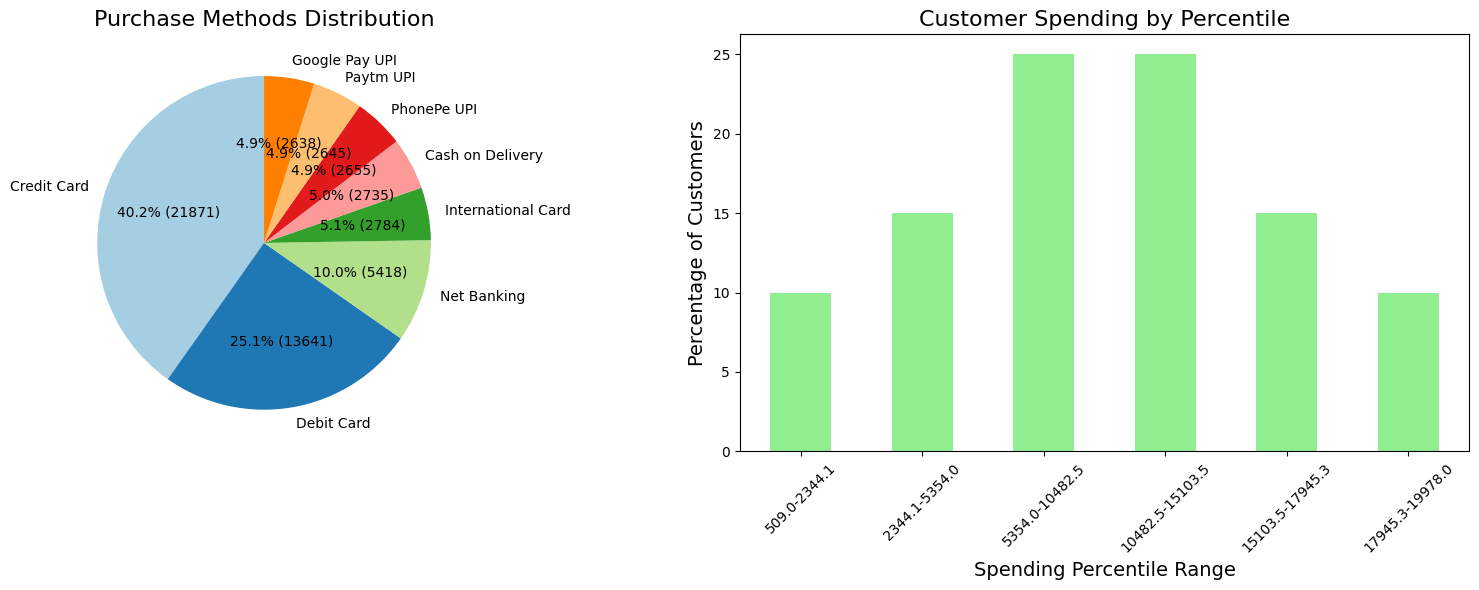

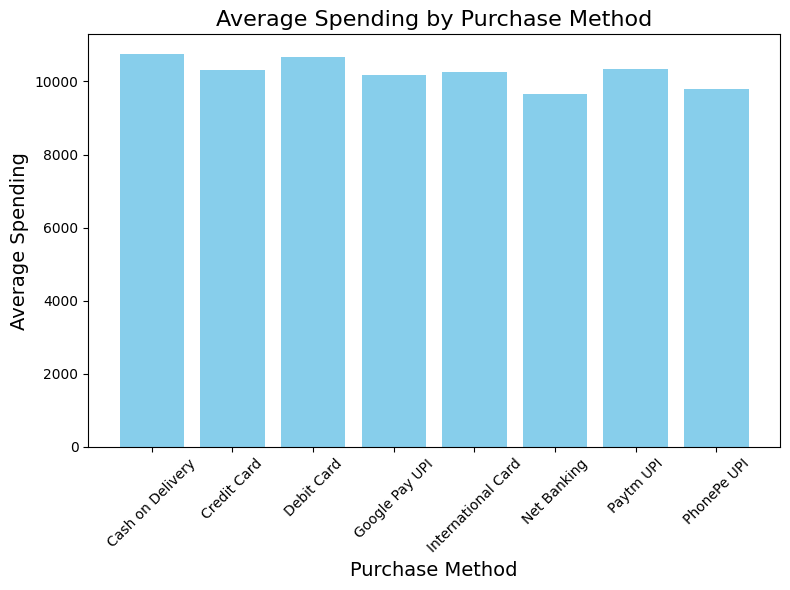

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

purchase_method_data = {
    'Purchase Method': [
        'Credit Card',
        'Debit Card',
        'Net Banking',
        'International Card',
        'Cash on Delivery',
        'PhonePe UPI',
        'Paytm UPI',
        'Google Pay UPI'
    ],
    'Count': [
        21871,
        13641,
        5418,
        2784,
        2735,
        2655,
        2645,
        2638
    ]
}

purchase_method_df = pd.DataFrame(purchase_method_data)


average_spending = data_cleaned.groupby('Purchase Method')['Gross Amount'].mean().reset_index()
average_spending.columns = ['Purchase Method', 'Average Spending']

gross_amounts = data_cleaned['Gross Amount']
percentiles = [10, 25, 50, 75, 90, 100]
percentile_val = np.percentile(gross_amounts, percentiles)
bins = np.insert(percentile_val, 0, gross_amounts.min())

percentile_labels = [
    f'{round(bins[i], 2)}-{round(bins[i+1], 2)}' for i in range(len(bins) - 1)
]

data_cleaned['Spending Percentile'] = pd.cut(gross_amounts, bins=bins, labels=percentile_labels, include_lowest=True)

percentile_distribution = data_cleaned['Spending Percentile'].value_counts(normalize=True) * 100

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
def autopct_format(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}% ({val:d})'
    return my_autopct

plt.pie(purchase_method_df['Count'], 
        labels=purchase_method_df['Purchase Method'], 
        autopct=autopct_format(purchase_method_df['Count']),
        startangle=90, 
        colors=plt.cm.Paired.colors)
plt.title('Purchase Methods Distribution', fontsize=16)

plt.subplot(1, 2, 2)
percentile_distribution.sort_index().plot(kind='bar', color='lightgreen')
plt.title('Customer Spending by Percentile', fontsize=16)
plt.xlabel('Spending Percentile Range', fontsize=14)
plt.ylabel('Percentage of Customers', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(average_spending['Purchase Method'], average_spending['Average Spending'], color='skyblue')
plt.title('Average Spending by Purchase Method', fontsize=16)
plt.xlabel('Purchase Method', fontsize=14)
plt.ylabel('Average Spending', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


     Location  Gross Amount
0   Ahmedabad   9130.028169
1   Bangalore   9764.859375
2     Chennai  10592.583333
3    Dehradun  10319.486486
4       Delhi  10150.900000
5   Hyderabad  10539.937500
6      Jaipur   9920.171875
7     Kolkata  11331.090909
8     Lucknow  10359.754098
9      Mumbai   9839.684932
10      Other  11061.285714
11       Pune  11731.287879
12   Srinagar   9823.205128
13   Varanasi  11799.594595


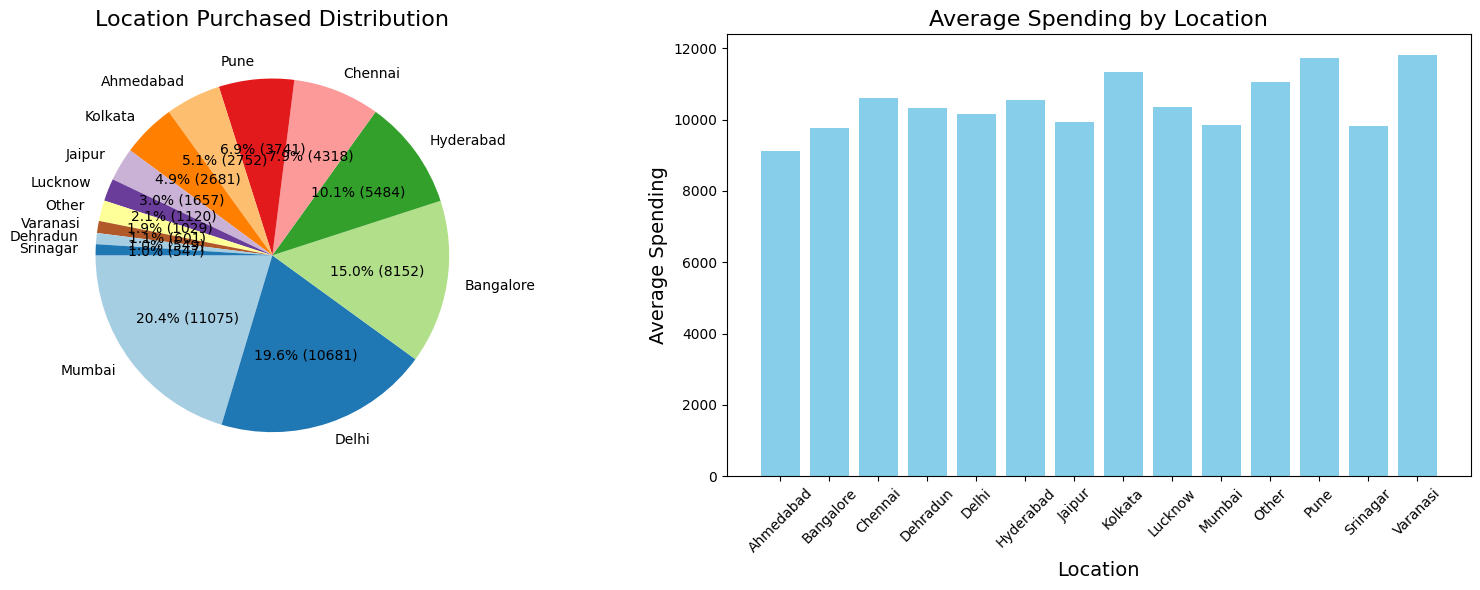

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

location_data = {
    'Location': [
        'Mumbai',
        'Delhi',
        'Bangalore',
        'Hyderabad',
        'Chennai',
        'Pune',
        'Ahmedabad',
        'Kolkata',
        'Jaipur',
        'Lucknow',
        'Other',
        'Varanasi',
        'Dehradun',
        'Srinagar'
    ],
    'Count': [
        11075,
        10681,
        8152,
        5484,
        4318,
        3741,
        2752,
        2681,
        1657,
        1120,
        1029,
        601,
        549,
        547
    ]
}

location_df = pd.DataFrame(location_data)

average_spending_by_location = data_cleaned.groupby('Location')['Gross Amount'].mean().reset_index()
print(average_spending_by_location)
average_spending_by_location.columns = ['Location', 'Average Spending']

percentiles = [0, 25, 50, 75, 100]
percentile_values = np.percentile(average_spending_by_location['Average Spending'], percentiles)

def categorize_spending(avg_spending):
    for i in range(len(percentiles) - 1):
        if avg_spending <= percentile_values[i + 1]:
            return percentiles[i]
    return percentiles[-1]

average_spending_by_location['Percentile'] = average_spending_by_location['Average Spending'].apply(categorize_spending)

percentile_plot_df = average_spending_by_location.groupby('Location')['Percentile'].first().reset_index()

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.pie(location_df['Count'], 
        labels=location_df['Location'], 
        autopct=autopct_format(location_df['Count']), 
        startangle=180, 
        colors=plt.cm.Paired.colors)
plt.title('Location Purchased Distribution', fontsize=16)

plt.subplot(1, 2, 2)
plt.bar(average_spending_by_location['Location'], average_spending_by_location['Average Spending'], color='skyblue')
plt.title('Average Spending by Location', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Average Spending', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
